# Problem 7 (20 points)

## Problem Description
A projectile is launched with input x- and y-velocity components. A dataset is provided, which contains launch velocity components as input and whether a target was hit (0/1) as an output. This data has a nonlinear decision boundary. 

You will use gradient descent to train a logistic regression model on the dataset to predict whether any given launch velocity will hit the target.



Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the previous problems.*

#### Summary of deliverables:
Functions (described in later section)
- `sigmoid(h)`
- `map_features(data)`
- `loss(data,y,w)`
- `grad_loss(data,y,w)`
- `grad_desc(data, y, w0, iterations, stepsize)`

Results:
- Print final `w` after training on the training data
- Plot of loss throughout training
- Print model percent classification accuracy on the training data
- Print model percent classification accuracy on the testing data
- Plot that shows the training data as data points, along with a decision boundary

#### Imports and Utility Functions:


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(data, c, title="", xlabel="$x_1$",ylabel="$x_2$",classes=["",""],alpha=1):
    N = len(c)
    colors = ['royalblue','crimson']
    symbols = ['o','s']
    
    plt.figure(figsize=(5,5),dpi=120)

    for i in range(2):
        x = data[:,0][c==i]
        y = data[:,1][c==i]

        plt.scatter(x,y,color=colors[i],marker=symbols[i],edgecolor="black",linewidths=0.4,label=classes[i],alpha=alpha)

    plt.legend(loc="upper right")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax = plt.gca()
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.title(title)

def plot_contour(w):
    res = 500
    vals = np.linspace(-0.05,1.05,res)
    x,y = np.meshgrid(vals,vals)
    XY = np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)
    prob = sigmoid(map_features(XY) @ w.reshape(-1,1))
    pred = np.round(prob.reshape(res, res))
    plt.contour(x, y, pred)


## Load Data
This cell loads the dataset into the following variables:
- `train_data`: Nx2 array of input features, used for training
- `train_gt`: Array of ground-truth classes for each point in `train_data`
- `test_data`: Nx2 array of input features, used for testing
- `test_gt`: Array of ground-truth classes for each point in `test_data`



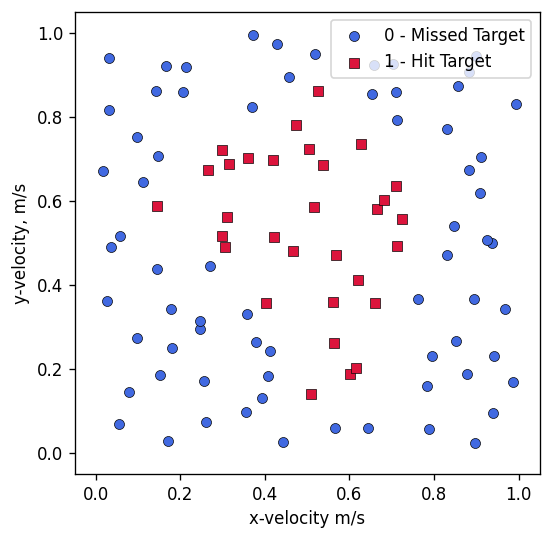

In [21]:
train = np.load("data/w3-hw1-data-train.npy")
test = np.load("data/w3-hw1-data-test.npy")
train_data, train_gt = train[:,:2], train[:,2]
test_data, test_gt = test[:,:2], test[:,2]
format = dict(xlabel="x-velocity m/s", ylabel="y-velocity, m/s", classes=["0 - Missed Target","1 - Hit Target"])
plot_data(train_data, train_gt, **format)

## Helper Functions
Here, implement the following functions:  

**`sigmoid(h)`**:
- Input: `h`, single value or array of values
- Returns: The sigmoid of h (or each value in h)

**`map_features(data)`**:
- Input: `data`, Nx2 array with rows $(x_i,y_i)$
- Returns: Nx45 array, each row with $(1, x_i,\; y_i,\; x_i^2,\; x_i y_i,\; y_i^2,\; x_i^3,\; x_i^2 y_i,\; ...)$ with all terms through 8th-order

**`loss(data, y, w)`**:
- Input: `data`, Nx2 array of un-transformed input features
- Input: `y`, Ground truth class for each input
- Input: `w`, Array with 45 weights
- Returns: Loss: $ L(x,y,w) = \sum_{i=1}^n -y^{(i)} \cdot \ln(g(w'x^{(i)})) - (1 - y^{(i)}) \cdot \ln(1 - g(w'x^{(i)})) $

**`grad_loss(data, y, w)`**:
- Input: `data`, Nx2 array of un-transformed input features
- Input: `y`, Ground truth class for each input
- Input: `w`, Array with 45 weights
- Returns: Gradient of loss with respect to weights: $ \frac{\partial L}{w_j} = \sum_{i=1}^n (g(w'x^{(i)}) - y^{(i)}) x_j^{(i)} $


In [22]:
def sigmoid(h):
    return (np.divide(1, (np.add(np.exp(-h), 1))))

def map_features(data):
    X = np.ones_like(data[:,0]).reshape(-1,1)
    for i in range(1,9):
        for j in range(1,i):
            X = np.concatenate([np.multiply(np.power(data[:,0], i-j+1), np.power(data[:,1], j+1)).reshape(-1,1), X], axis=1)
        X = np.concatenate([np.power(data[:,0], i).reshape(-1,1), X], axis=1)
        X = np.concatenate([np.power(data[:,1], i).reshape(-1,1), X], axis=1)
    return X

def loss(data, y, w):
    loss = 0
    X = map_features(data)
    wt_x = np.sum((w * X), axis=1)
    J1 = -np.log(sigmoid(wt_x)) * y
    J2 = -np.log(1-sigmoid(wt_x)) * (1-y)
    L = np.sum(J1 + J2)
    return L

def grad_loss(data, y, w):
    X = map_features(data)
    wt_x = np.sum((w * X), axis=1)
    return np.sum((sigmoid(wt_x) - y).reshape(-1,1) * X, axis=0)

## Gradient Descent
Now, write a gradient descent function with the following specifications:  


**`grad_desc(data, y, w0, iterations, stepsize)`**:
- Input: `data`, Nx2 array of un-transformed input features
- Input: `y`, array of size N with ground-truth class for each input
- Input: `w0`, array of weights to use as an initial guess (size)
- Input `iterations`, number of iterations of gradient descent to perform
- Input: `stepsize`, size of each gradient descent step
- Return: Final `w` array after last iteration
- Return: Array containing loss values at each iteration


In [23]:
def grad_desc(data, y, w0, iterations, stepsize):
    loss_data = [loss(data, y, w0)]
    for i in range(iterations):
        w0 = w0 - stepsize*grad_loss(data, y, w0)
        loss_data.append(loss(data, y, w0))
    return w0, np.array(loss_data)

### Training

Run your gradient descent function and plot the loss as it converges. You may have to tune the step size and iteration count.

Also print the final vector `w`.

In [24]:
n = 10000
step = 0.001
w0 = np.ones(45)
w, loss_data = grad_desc(train_data, train_gt, w0, n, step)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-3.26554133 -3.5337449  -0.51234658 -0.3572217  -0.28210304 -0.25189916
 -0.26960482 -0.35976476 -0.58358581 -3.40617231 -3.91440032 -0.61523439
 -0.48559149 -0.4364916  -0.44216112 -0.5250694  -0.75410276 -3.36403926
 -4.15806968 -0.68355583 -0.59989799 -0.59919526 -0.67814224 -0.91082355
 -2.98944277 -4.0869536  -0.67893617 -0.67494082 -0.7658958  -1.00785672
 -2.0432341  -3.37561706 -0.53314337 -0.66655089 -0.94465884 -0.17912172
 -1.45528233 -0.12482279 -0.50419784  2.94119513  2.50481334  0.7597856
  6.47904007  8.25949274 -5.71198449]


Text(0.5, 1.0, 'Loss Function')

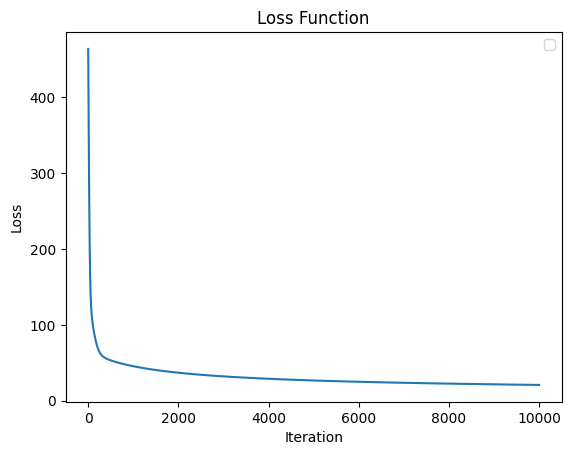

In [25]:
print(w)

fig = plt.figure()
plt.plot(np.linspace(0,n,n+1), loss_data)
plt.legend(loc="upper right")
plt.xlabel("Iteration")
plt.ylabel("Loss")
ax = plt.gca()
plt.title("Loss Function")


## Accuracy
Compute the accuracy of the model, as a percent, for both the training data and testing data

In [26]:
train_preds = np.round(sigmoid(np.sum((w * map_features(train_data)), axis=1))).astype(int)
test_preds = np.round(sigmoid(np.sum((w * map_features(test_data)), axis=1))).astype(int)
train_accuracy = np.sum(train_preds == train_gt) / len(train_gt) * 100
test_accuracy = np.sum(test_preds == test_gt) / len(test_gt) * 100
print("    Train Accuracy: ", train_accuracy, r"%")
print("    Test Accuracy: ", test_accuracy, r"%")

    Train Accuracy:  97.0 %
    Test Accuracy:  96.0 %


## Visualize Results

Use the provided plotting utilities to plot the decision boundary with the data.


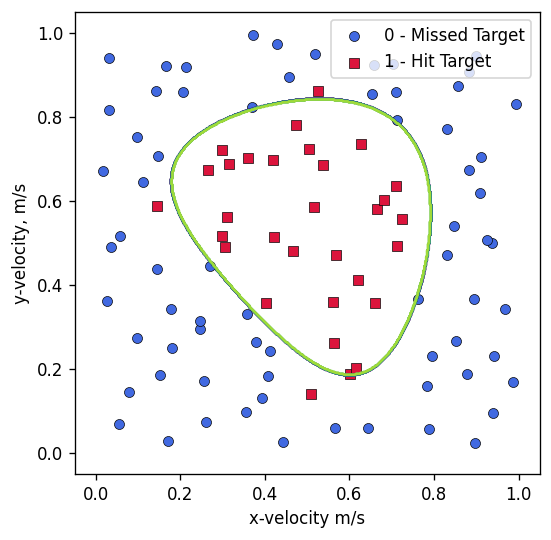

In [27]:
# You may have to modify this code, i.e. if you named 'w' differently)
plot_data(train_data, train_gt, **format)
plot_contour(w)